## Exploratory Data Analysis (EDA)

## Data Information

The Haberman's Survival data set contains cases from a study that was conducted between 1958 and 1970 at the university of Chicago's Billing hospital on the survival of patients who had undergone surgery for breast cancer

## Data Features
1) We have age of patients during the operation

2) Year of operation 

3) Number of axillary nodes detected in a patient

4) Status as 1 when the patient survived 5 years or longer, 2 when the patient died with in 5 years


## Objective 
To classify/predict a patient survival who had undergone surgery for breast cancer


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("haberman.csv")
## Data dimensions
print(data.shape)

(306, 4)


In [ ]:
## Data columns 
print(data.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
## How many points of each class present
data["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

## 2-D Scatter plot (Bi-Variate Analysis)

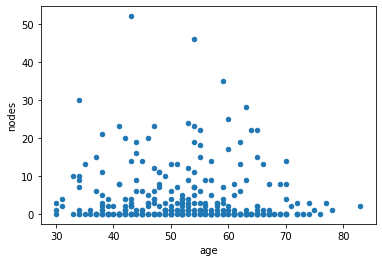

In [ ]:
data.plot(kind='scatter',x='age',y='nodes')
plt.show()

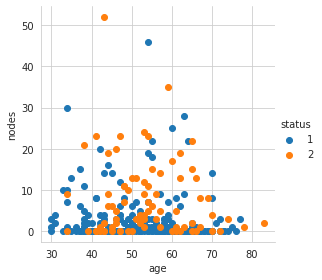

In [ ]:
## 2D scatter plot for coloring each class
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='status',height=4).map(plt.scatter,"age","nodes").add_legend()
plt.show()


## Observations
1) When we consider 'Age' of the patient during the operation and number of 'nodes' detected, we cannot distinguish patients as per the classes (status) as we have a maximum overlap between both the classes (status 1 and 2) as shown in the above figure

2) However we can observe that patients who has age between 30 and 40 has higher rate of survival with maximum axillary nodes of 30.  

## Pair Plot (Bi-Variate Analysis)


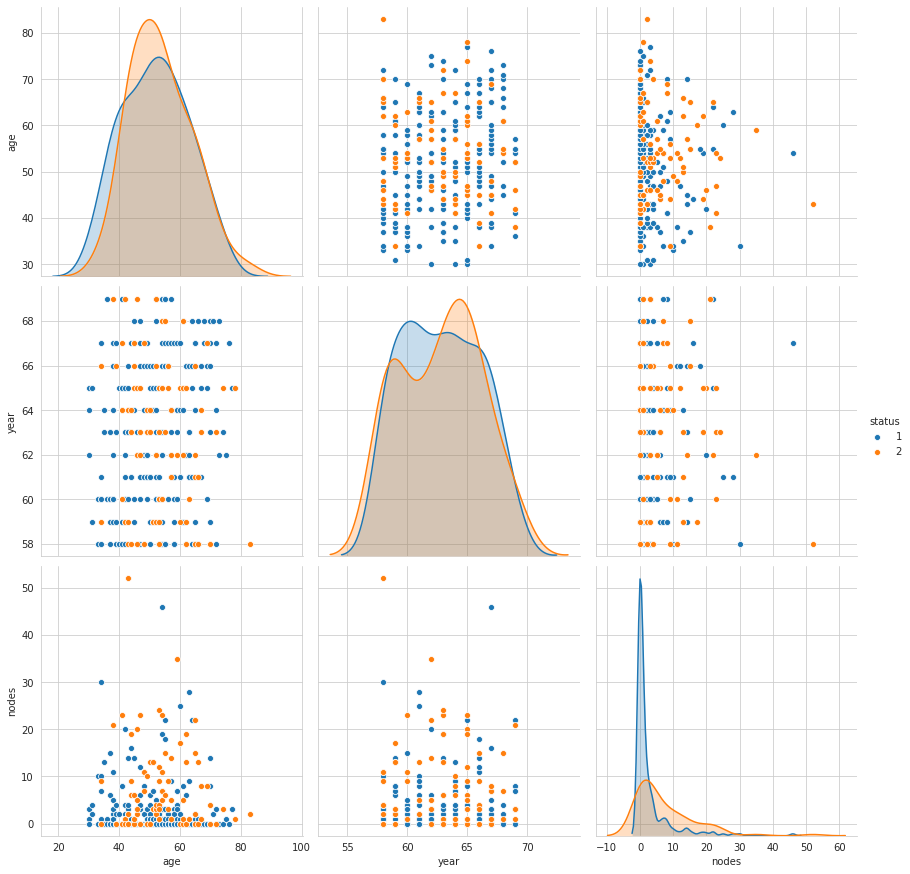

In [ ]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue='status',height=4)
plt.show()

## Observations
1) The pair plot is not much useful in this case, as we cannot find the useful features for classification because of too much overlapping between them as shown in the above plot

2) However we can consider plot between age and nodes, as we can notice that patients between age of 20 to 40 have higher chance of survival ( status 1) with maximum axillary nodes of 30

## Histogram, PDF, CDF ( UniVariate Analysis)

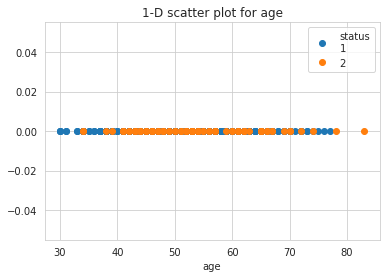

In [ ]:
one = data.loc[data["status"] == 1]
two = data.loc[data["status"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "status\n" "1")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

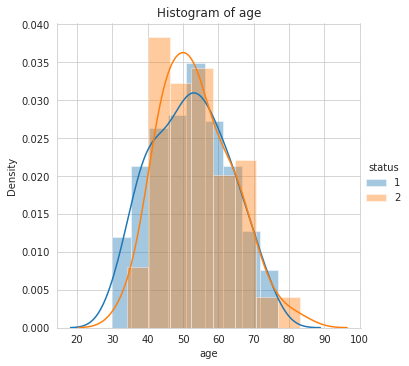

In [ ]:
sns.FacetGrid(data, hue="status",height=5).map(sns.distplot,"age").add_legend()
plt.ylabel("Density")
plt.title("Histogram of age")
plt.show()

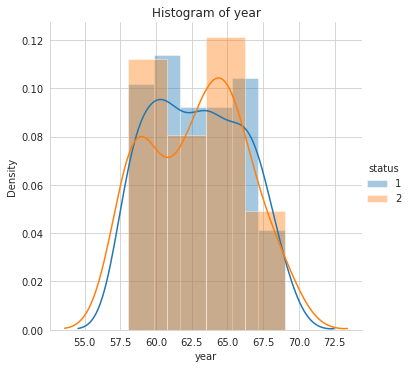

In [ ]:
sns.FacetGrid(data, hue="status",height=5).map(sns.distplot,"year").add_legend()
plt.ylabel("Density")
plt.title("Histogram of year")
plt.show()

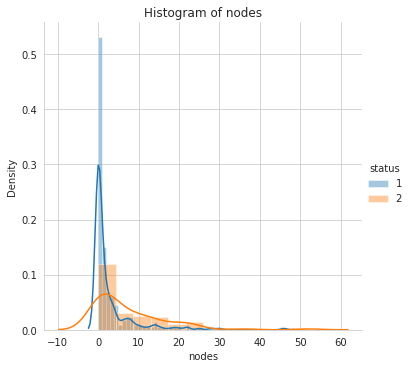

In [ ]:
sns.FacetGrid(data, hue="status",height=5).map(sns.distplot,"nodes").add_legend()
plt.ylabel("Density")
plt.title("Histogram of nodes")
plt.show()


## Observations
1) All the features are overlapping each other massively

2) However, we can see patients with 0 nodes have highest survival rate

### CDF

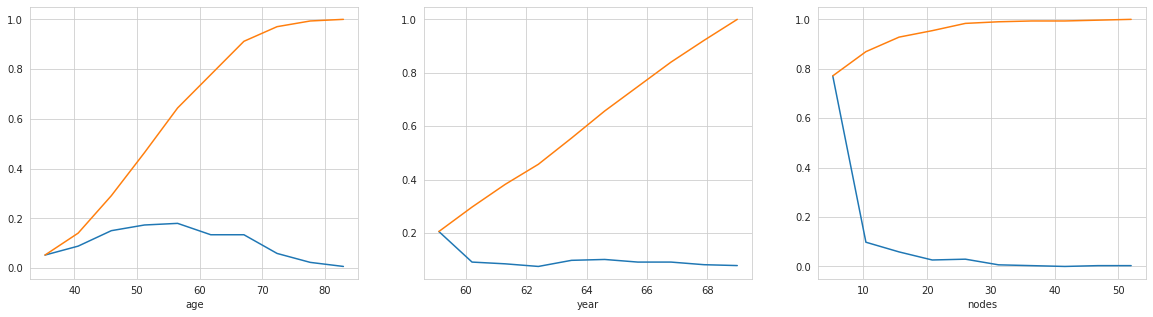

In [ ]:
plt.figure(figsize=(20,5))
for i, j in enumerate(list(data.columns)[:-1]):
    plt.subplot(1, 3, i+1)
    counts, bin_edges = np.histogram(data[j], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(j)

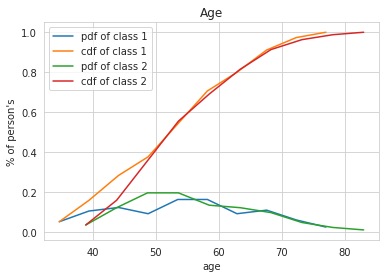

In [ ]:
one = data.loc[data["status"] == 1]
two = data.loc[data["status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("Age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

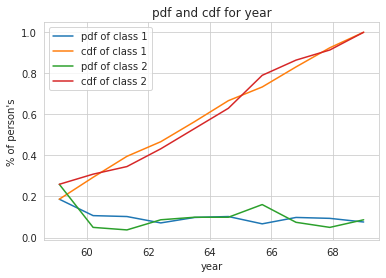

In [ ]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for year")
plt.xlabel("year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

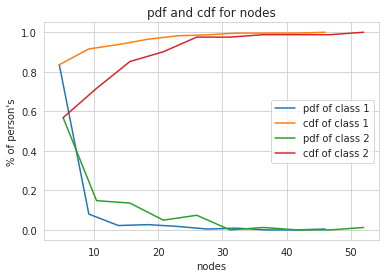

In [ ]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for nodes")
plt.xlabel("nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

## Observations

1) Patients who has more than 45 nodes are not survived

2) The survival rate is extremely high for patients having less than 3 nodes

## Box Plot

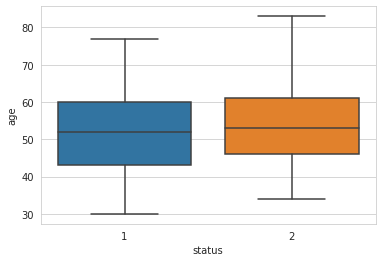

In [ ]:
sns.boxplot(x='status',y='age',data=data)
plt.show()

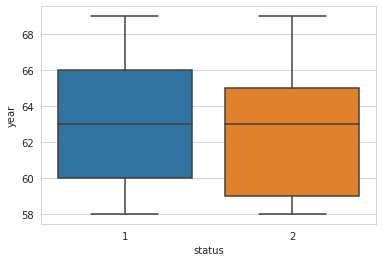

In [ ]:
sns.boxplot(x='status',y='year',data=data)
plt.show()

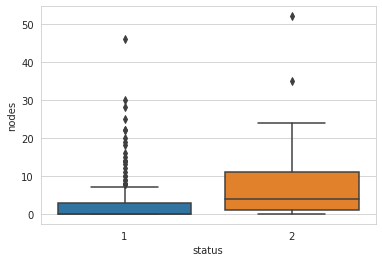

In [ ]:
sns.boxplot(x='status',y='nodes',data=data)
plt.show()

## Observations

1) Boxplot of status 1 has the 75th percentile value at axillary nodes detected is 2.

2) Boxplot of status 2 has 25th percentile value at axillary nodes detected is 1, 50th percentile value at axillary nodes detected is 3 and 75th percentile value at axillary nodes detected is 11.



## Violin Plot

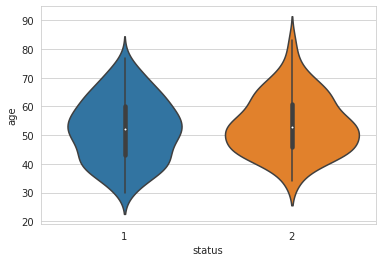

In [ ]:
sns.violinplot(x='status',y='age',data=data)
plt.show()

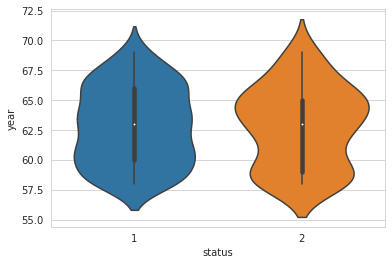

In [ ]:
sns.violinplot(x='status',y='year',data=data)
plt.show()

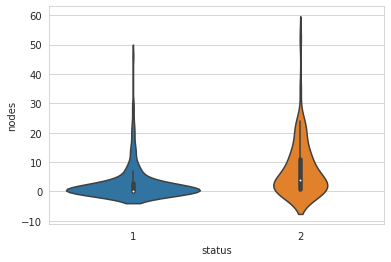

In [ ]:
sns.violinplot(x='status',y='nodes',data=data)
plt.show()

## Observations

1) 50th percentile of the class 1 ( status 1) has 0 axillary nodes, 75 percentile of survivers has less than 3 axillary nodes

2) 25 th percentile of not survived class (status 2) have 1 axillary node, 50th percentile have below 4 axillary nodes and 75th percentile has axillary nodes below 11

## Conclusion
By plotting PDF, CDF, pair plots, scatter plots etc, we can conclude only one thing that:

1) If the number of axillary nodes is less, then survival of patients is more.

2) The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.

3) We need more features or a complex technique to handle this data set and to come to a better conclusion.